In [1]:
# Instalação dos pacotes
!pip install pandas
!pip install pingouin
!pip install statsmodels.api
!pip install scikit-posthocs

ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api


In [2]:
#Carregando Library
import pandas as pd
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scikit_posthocs as sp
import tkinter as tk
from tkinter import filedialog as fd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### Carregando arquivo

In [4]:
myDf = pd.read_csv('./input/ANOVA-Matriz2.csv')
myDf

,categoria,rank_medio
0,0.00a0.30,536.5
1,0.00a0.30,313.5
2,0.00a0.30,560.0
3,0.30a0.35,473.5
4,0.30a0.35,538.8
...,...,...
435,0.71a0.81,469.0
436,0.71a0.81,471.0
437,0.71a0.81,500.0
438,0.71a0.81,491.0


In [5]:
aov = pg.anova(dv='rank_medio', between='categoria', data=myDf, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,categoria,2.163717e+06,8,270464.677723,14.796843,3.504475e-19,0.215472
1,Within,7.878050e+06,431,18278.539085,NaN,NaN,NaN


In [6]:
model = ols('rank_medio ~ categoria', data=myDf).fit()
aovRes = sm.stats.anova_lm(model, typ=2)
aovRes

,sum_sq,df,F,PR(>F)
categoria,2.163717e+06,8.0,14.796843,3.504475e-19
Residual,7.878050e+06,431.0,NaN,NaN


In [7]:
tukey = pairwise_tukeyhsd(endog=myDf['rank_medio'], groups=myDf['categoria'], alpha=0.05)
print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
0.00a0.30 0.30a0.35   36.2591    1.0 -238.2791  310.7973  False
0.00a0.30 0.36a0.40  -75.9333  0.997 -373.9776  222.1109  False
0.00a0.30 0.41a0.50  -22.1478    1.0 -275.4367  231.1411  False
0.00a0.30 0.51a0.55 -143.5941 0.7025 -396.6195  109.4314  False
0.00a0.30 0.56a0.60 -122.4938 0.8337 -369.7397  124.7522  False
0.00a0.30 0.61a0.65 -205.5724 0.1862 -451.3142   40.1695  False
0.00a0.30 0.66a0.70 -220.4663 0.1267  -468.396   27.4633  False
0.00a0.30 0.71a0.81  -64.9565 0.9973 -323.6931  193.7801  False
0.30a0.35 0.36a0.40 -112.1924  0.785 -326.1109   101.726  False
0.30a0.35 0.41a0.50  -58.4069 0.9437  -203.617   86.8033  False
0.30a0.35 0.51a0.55 -179.8531 0.0039 -324.6033   -35.103   True
0.30a0.35 0.56a0.60 -158.7529 0.0079 -293.1452  -24.3605   True
0.30a0.35 0.61a0.65 -241.8315    0.0 -37

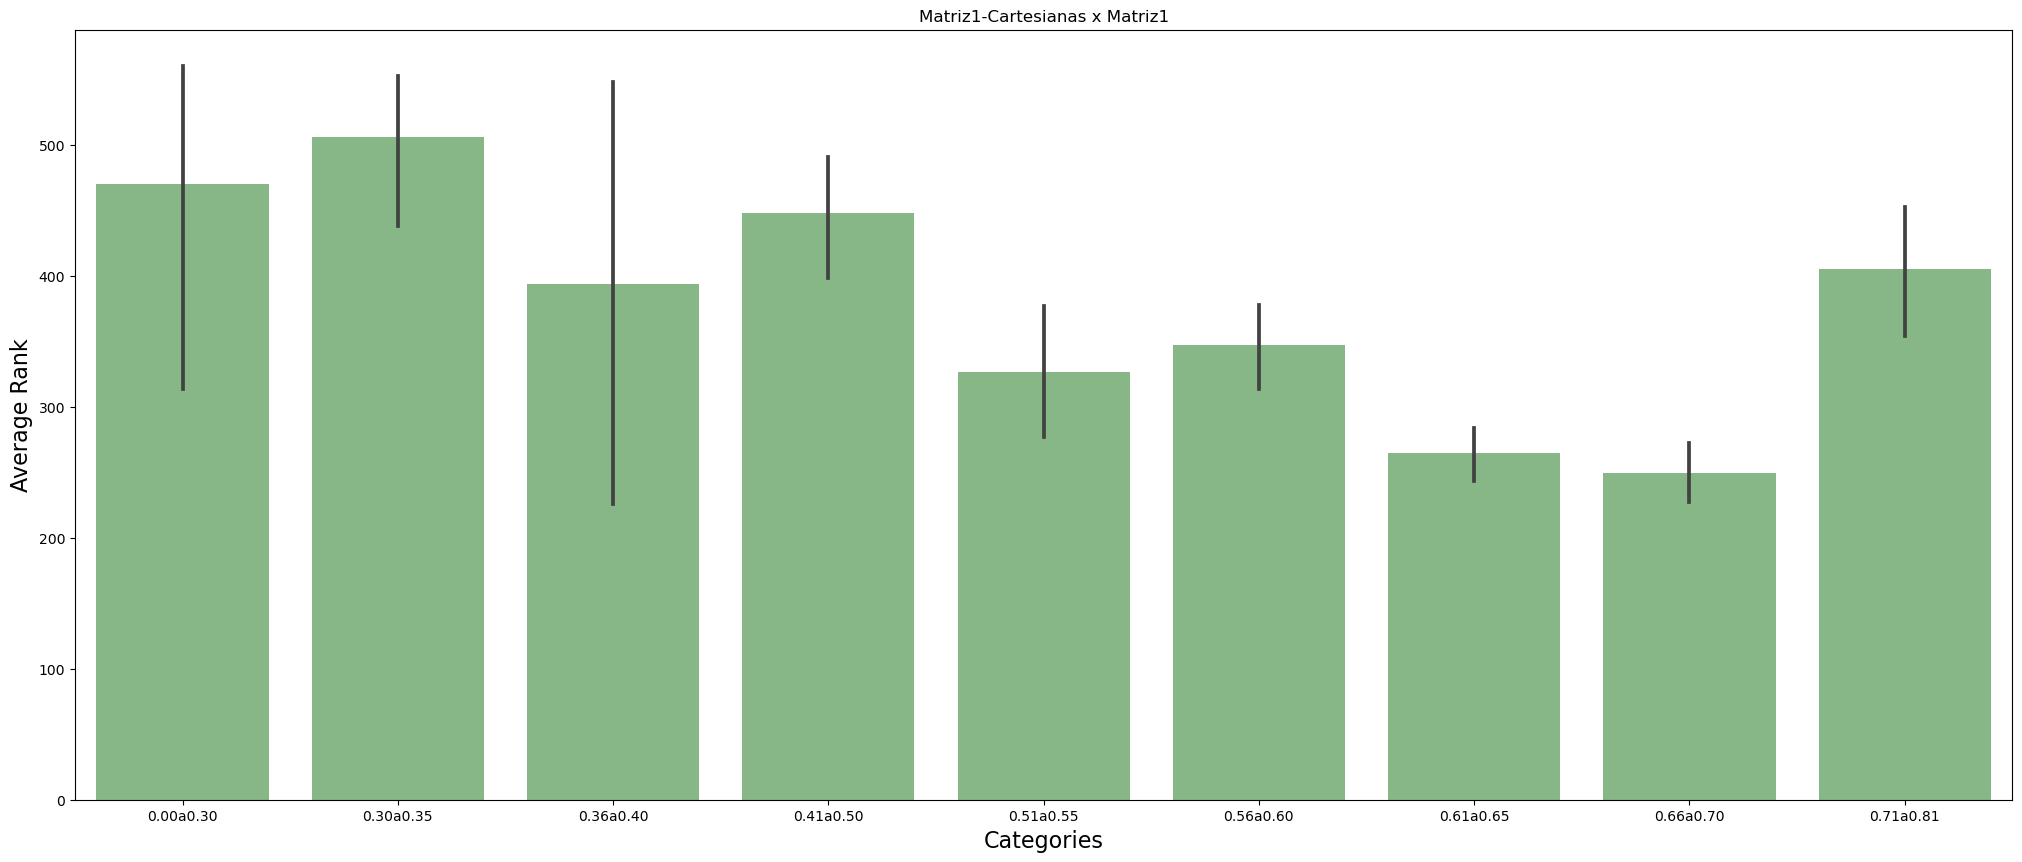

In [8]:
plt.figure(figsize=(25, 10))
# class v / s fare barplot
sns.barplot(x = 'categoria', y = 'rank_medio', data = myDf, color="green", alpha=.5).set(title='Matriz1-Cartesianas x Matriz1')
#plt.tick_params(axis='x', rotation=90)
# Show the plot
plt.xlabel('Categories', fontsize=16);
plt.ylabel('Average Rank', fontsize=16);
plt.savefig("./output/plot-Matriz.png", dpi = 150, facecolor = "white")
plt.show()

## Regressao Linear Simples

In [9]:
reg = pd.read_excel('./input/GRAFICO-MATRIZ1.xlsx')
reg

FileNotFoundError: [Errno 2] No such file or directory: './input/GRAFICO-MATRIZ1.xlsx'

In [23]:
X1 = reg['poximidade']
Y1 = reg['rank_medio']
modelo = sm.OLS(Y1, sm.add_constant(X1)).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:             rank_medio   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     167.0
Date:                Sun, 27 Nov 2022   Prob (F-statistic):           1.38e-32
Time:                        17:56:07   Log-Likelihood:                -2761.1
No. Observations:                 440   AIC:                             5526.
Df Residuals:                     438   BIC:                             5534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        592.2291     22.235     26.635      0.0

In [24]:
sm.stats.anova_lm(ols('rank_medio ~ poximidade', data=reg).fit())

,df,sum_sq,mean_sq,F,PR(>F)
poximidade,1.0,2.771498e+06,2.771498e+06,166.969826,1.383878e-32
Residual,438.0,7.270273e+06,1.659880e+04,NaN,NaN


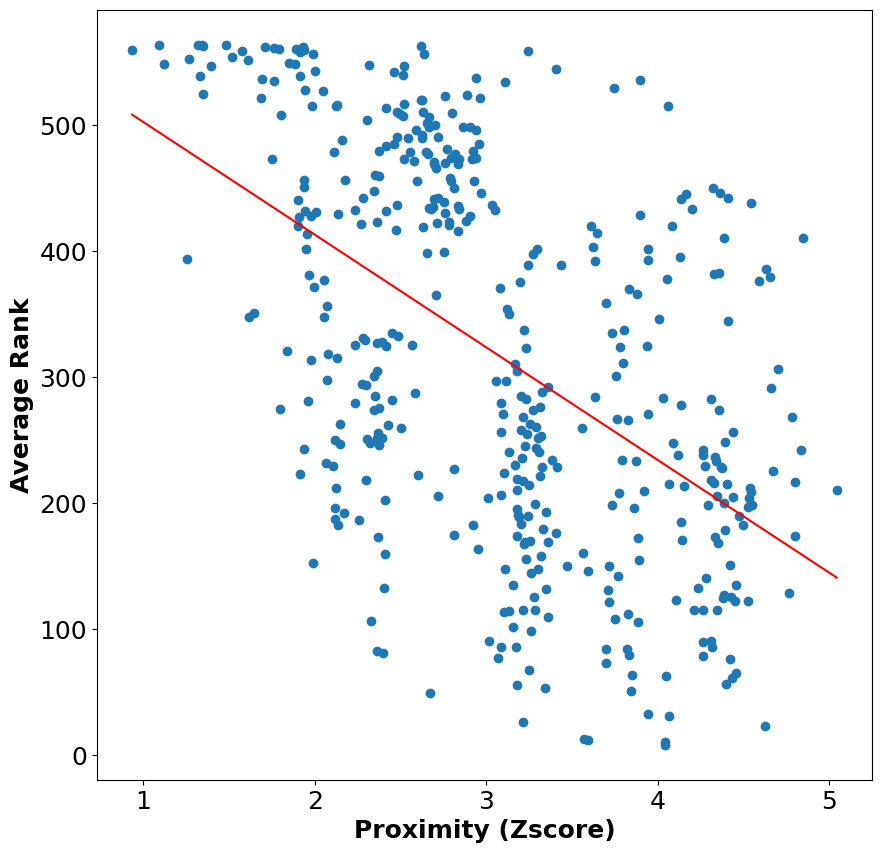

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(X1,Y1)
plt.plot(X1, modelo.predict(), color="r")
plt.xlabel("Proximity (Zscore)", size=18, fontweight="bold")
plt.ylabel("Average Rank", size=18, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.savefig("plot-RegressaoMatriz1.png", dpi = 150, facecolor = "white")